In [16]:
from datagen import DataGenerator
from fineNeat import Ind
# from fineNeat.sneat_jax import act
from jax import numpy as jnp 
from tune import train_params

generator = DataGenerator(train_size=2000, batch_size=1000)
choice_id = 0
nInput = 2
nOutput = 2 

train_data, test_data = generator.generate_random_dataset(choice=choice_id)  # 0 for circle dataset

ind = Ind.from_shapes([(nInput, 5), (5, 5), (5, nOutput)])
ind.express()

wMat = jnp.copy(ind.wMat)
aVec = jnp.array(ind.aVec)

config_dict = {0: (0.01, 400), 1: (0.01, 400), 2: (0.01, 400), 3: (0.001, 1600)} # circle dataset use 0.01
learning_rate, n_epochs = config_dict[choice_id]

wMat, loss_value = train_params(wMat, aVec, nInput, nOutput, train_data, generator, learning_rate=learning_rate, n_epochs=n_epochs, interval=10)

Epoch 1, Loss: 0.3440174162387848
Epoch 11, Loss: 0.3103753924369812
Epoch 21, Loss: 0.2837117910385132
Epoch 31, Loss: 0.2550051808357239
Epoch 41, Loss: 0.23137851059436798
Epoch 51, Loss: 0.21769267320632935
Epoch 61, Loss: 0.2116854041814804
Epoch 71, Loss: 0.20384664833545685
Epoch 81, Loss: 0.20059826970100403
Epoch 91, Loss: 0.19162799417972565
Epoch 101, Loss: 0.19482310116291046
Epoch 111, Loss: 0.19337186217308044
Epoch 121, Loss: 0.17777025699615479
Epoch 131, Loss: 0.16760219633579254
Epoch 141, Loss: 0.16533763706684113
Epoch 151, Loss: 0.1539461761713028
Epoch 161, Loss: 0.14883451163768768
Epoch 171, Loss: 0.14202594757080078
Epoch 181, Loss: 0.14070460200309753
Epoch 191, Loss: 0.1308395266532898
Epoch 201, Loss: 0.1303793042898178
Epoch 211, Loss: 0.1332024484872818
Epoch 221, Loss: 0.11765636503696442
Epoch 231, Loss: 0.11508718878030777
Epoch 241, Loss: 0.11300775408744812
Epoch 251, Loss: 0.10666240751743317
Epoch 261, Loss: 0.10250325500965118
Epoch 271, Loss: 0.10

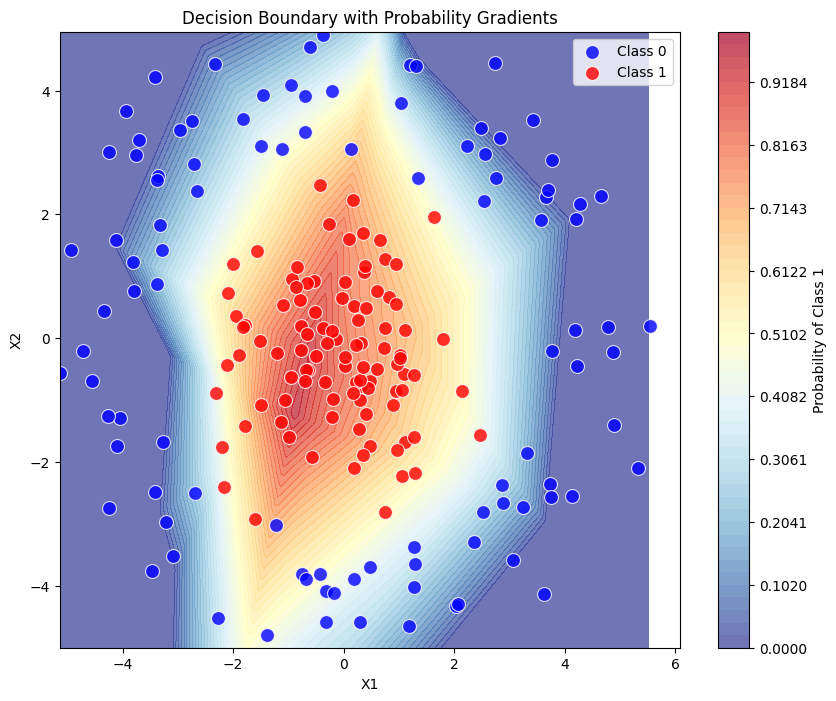

In [17]:
from viz import plot_decision_boundary
plot_decision_boundary(wMat, aVec, nInput, nOutput, test_data)

NEAT-backprop training on classification dataset

In [1]:
# Two Stage Training: topology search with NEAT, weight search with backprop (essentially replacing SNeat)
# - for simplicity, let's pick best few species at the end of NEAT stage, and do backprop on them, then select the best one and propagate into NEAT stage to do further search 
# - this way we reduce the workload a bit and have a more clear separation between the stages ... since we know SNeat works well for SlimeVolleyBall 


from fineNeat import Neat 
from fineNeat import loadHyp, updateHyp, load_cls_task
from datagen import DataGenerator
from tune import get_reward

choice_id = 0
generator = DataGenerator(train_size=2000, batch_size=1000)
train_data, test_data = generator.generate_random_dataset(choice=choice_id)  # 0 for circle dataset


hyp_default = '../fineNeat/fineNeat/p/cls.json'
hyp_adjust = '../fineNeat/fineNeat/p/cls_neat.json'
fileName = "cls"

hyp = loadHyp(pFileName=hyp_default, load_task=load_cls_task)
updateHyp(hyp,load_cls_task,hyp_adjust)

In [ ]:
from tune import get_reward, backprop_per_species


# Iterate 2-stage neat-backprop 


# First Stage features NEAT topology search 
neat = Neat(hyp)
neat.initPop()
for _ in range(4): 
    pop = neat.ask()
    rewards = get_reward(pop, test_data, nInput=2, nOutput=2)
    neat.tell(rewards)
    
# Second Stage features back-prop on top seeds
best_ind = backprop_per_species(neat, train_data, test_data, generator, n_top_seed=8, learning_rate=0.01, n_epochs=400, nInput=2, nOutput=2)


 :: Cycle detected in neural network. Unprocessed nodes: {4, 5}
:: Failed to express child
Epoch 1, Loss: 2.6256227493286133
Epoch 51, Loss: 0.6192794442176819
Epoch 101, Loss: 0.478534072637558
Epoch 151, Loss: 0.458050936460495
Epoch 201, Loss: 0.4514281749725342
Epoch 251, Loss: 0.4518982470035553
Epoch 301, Loss: 0.45311397314071655
Epoch 351, Loss: 0.4588485360145569
Epoch 1, Loss: 2.905510425567627
Epoch 51, Loss: 0.3124442398548126
Epoch 101, Loss: 0.26468876004219055
Epoch 151, Loss: 0.255814790725708
Epoch 201, Loss: 0.24948185682296753
Epoch 251, Loss: 0.23857536911964417
Epoch 301, Loss: 0.23033207654953003
Epoch 351, Loss: 0.22304363548755646
Epoch 1, Loss: 3.2692344188690186
Epoch 51, Loss: 0.30280452966690063
Epoch 101, Loss: 0.28206661343574524
Epoch 151, Loss: 0.27896010875701904
Epoch 201, Loss: 0.2765032947063446
Epoch 251, Loss: 0.2861906886100769
Epoch 301, Loss: 0.2923862040042877
Epoch 351, Loss: 0.2690451741218567
Epoch 1, Loss: 4.075031757354736
Epoch 51, Loss: 

In [4]:
best_ind.fitness

0.014980137348175049

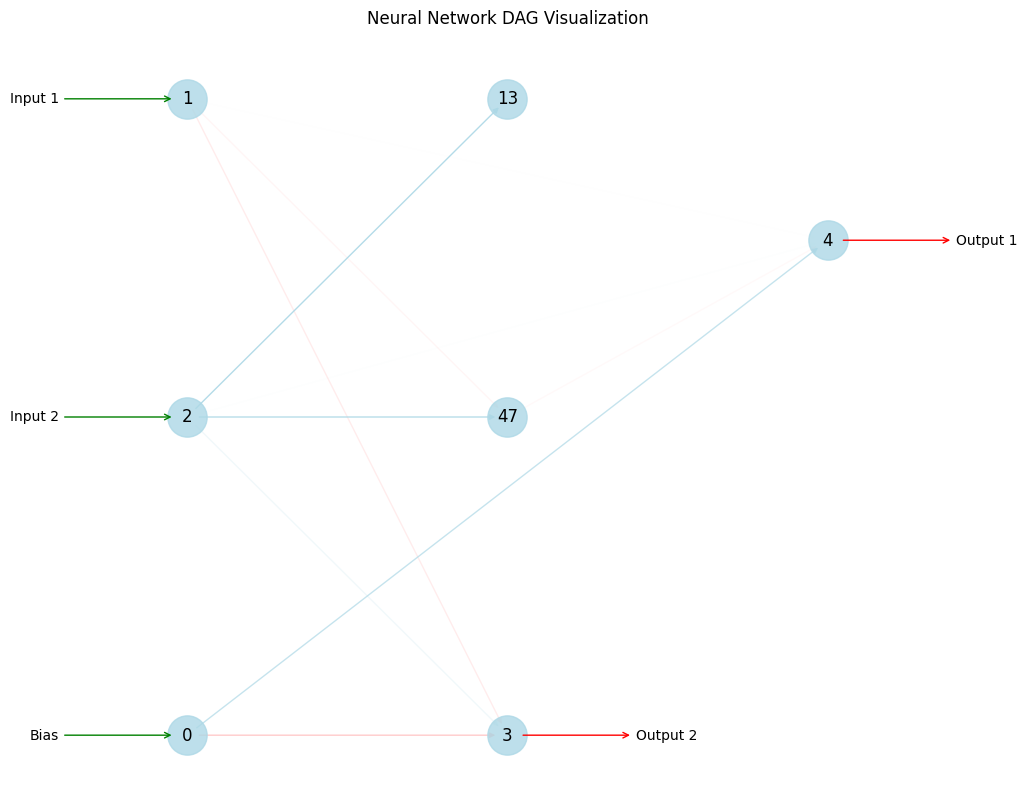

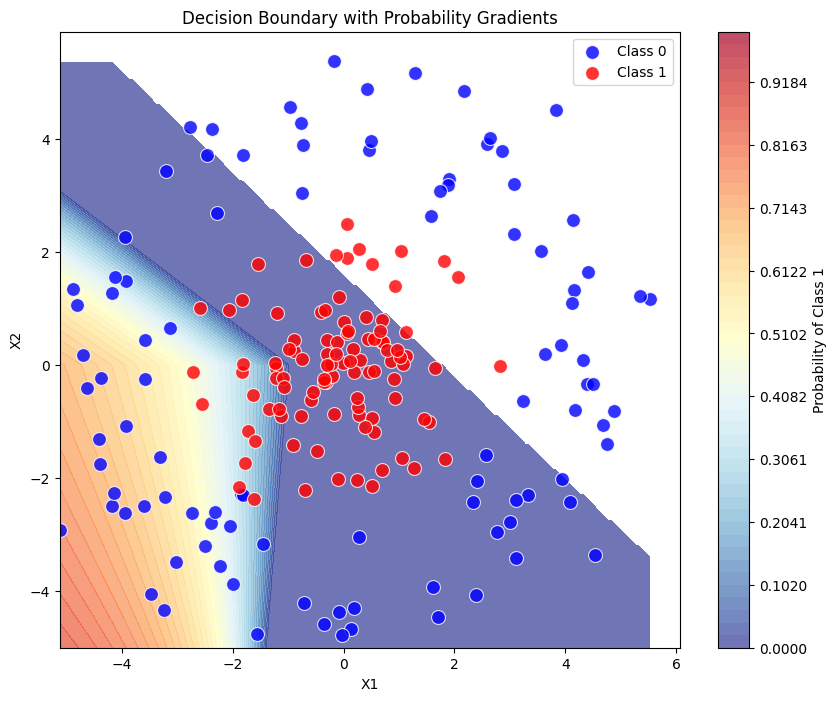

In [6]:
from fineNeat import viewInd 

viewInd(best_ind)

from viz import plot_decision_boundary
nInput, nOutput = 2, 2
plot_decision_boundary(best_ind.wMat, best_ind.aVec, nInput, nOutput, test_data)
